# MODEL BUILDING OF CNN TO CLASSIFY THE CAR DAMAGE


In [1]:
#IMPORTING THE LIBRARIES NEEDED
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

Using TensorFlow backend.
C:\Users\AKHILA\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\AKHILA\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\AKHILA\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\AKHILA\anaconda3\lib\site-packages\tensorflow\python\framework\dtype

# DATA PREPROCESSING

In [2]:
#Importing the ImageDataGenerator library and configuring the ImageDataGenerator class
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [3]:
#Applying the ImageDataGenerator Functionalities to Trainset
x_train = train_datagen.flow_from_directory(r"C:\Users\AKHILA\Desktop\Cardataset\Trainset",target_size = (64,64),batch_size = 32, class_mode = "categorical")


Found 316 images belonging to 4 classes.


In [4]:
##Applying the ImageDataGenerator Functionalities to Testset
x_test = test_datagen.flow_from_directory(r"C:\Users\AKHILA\Desktop\Cardataset\Testset",target_size = (64,64),batch_size = 32, class_mode = "categorical")

Found 175 images belonging to 4 classes.


# MODEL BUILDING

In [5]:
x_train.class_indices

{'dent': 0, 'glass_shatter': 1, 'lights': 2, 'scratch': 3}

In [6]:
#Initalizing the model
model = Sequential()

In [7]:
#Adding the convolution layer
model.add(Convolution2D(20,(3,3),input_shape = (64,64,3),activation = "relu"))

In [8]:
#Max pooling
model.add(MaxPooling2D(pool_size = (2,2)))

In [9]:
#Flattening the layers
model.add(Flatten())

In [10]:
#Adding the Hidden layer
model.add(Dense(units = 128,init = "uniform", activation = "relu"))

C:\Users\AKHILA\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=128, activation="relu", kernel_initializer="uniform")`
  


In [11]:
#Adding the output layer
model.add(Dense(units = 4,init = "uniform", activation = "softmax"))

C:\Users\AKHILA\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=4, activation="softmax", kernel_initializer="uniform")`
  


In [12]:
#Configuring the learning process
model.compile(optimizer = "adam",loss = "categorical_crossentropy",metrics = ["accuracy"])

In [13]:
model.fit_generator(x_train,steps_per_epoch = 15 ,epochs = 10,validation_data = x_test,validation_steps =8)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/10
15/15 [==============================] - 16s 1s/step - loss: 1.4189 - acc: 0.3098 - val_loss: 1.2997 - val_acc: 0.4059
Epoch 2/10
15/15 [==============================] - 5s 357ms/step - loss: 1.2047 - acc: 0.4688 - val_loss: 1.2821 - val_acc: 0.3766
Epoch 3/10
15/15 [==============================] - 5s 351ms/step - loss: 1.0899 - acc: 0.5474 - val_loss: 1.1972 - val_acc: 0.4505
Epoch 4/10
15/15 [==============================] - 5s 365ms/step - loss: 1.0672 - acc: 0.5203 - val_loss: 1.2208 - val_acc: 0.4435
Epoch 5/10
15/15 [==============================] - 5s 327ms/step - loss: 1.0127 - acc: 0.5604 - val_loss: 1.2110 - val_acc: 0.5021
Epoch 6/10
15/15 [==============================] - 5s 345ms/step - loss: 0.9280 - acc: 0.6214 - val_loss: 1.2462 - val_acc: 0.4009
Epoch 7/10
15/15 [==============================] - 6s 369ms/step - loss: 0.8852 - acc: 0.6306 - val_loss: 1.1380 -

In [14]:
from keras.models import load_model
from keras.preprocessing import image

In [15]:
#Saving the model
model.save("car.h5")

# TESTING THE MODEL

In [16]:
# loading the image to be predicted in the variable img
img = image.load_img(r"C:\Users\AKHILA\Desktop\dc.jpg",target_size = (64,64))

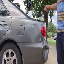

In [17]:
# resized image(64, 64)
img

In [18]:
import numpy as np
x  = image.img_to_array(img)

In [19]:
x

array([[[131., 137., 153.],
        [ 67.,  71.,  82.],
        [216., 216., 224.],
        ...,
        [121., 106., 109.],
        [ 79.,  68.,  76.],
        [ 72.,  67.,  87.]],

       [[120., 126., 142.],
        [122., 126., 138.],
        [ 92.,  92., 104.],
        ...,
        [ 82.,  72.,  99.],
        [ 91.,  85., 113.],
        [ 75.,  75., 111.]],

       [[140., 145., 164.],
        [106., 109., 126.],
        [135., 134., 150.],
        ...,
        [137., 139., 196.],
        [101., 106., 161.],
        [ 85.,  97., 149.]],

       ...,

       [[ 67.,  64.,  71.],
        [ 69.,  64.,  68.],
        [162., 153., 156.],
        ...,
        [ 35.,  34.,  50.],
        [ 24.,  23.,  39.],
        [ 29.,  28.,  44.]],

       [[ 68.,  65.,  72.],
        [ 71.,  66.,  70.],
        [173., 164., 167.],
        ...,
        [ 33.,  32.,  48.],
        [ 28.,  27.,  43.],
        [ 29.,  28.,  44.]],

       [[ 69.,  66.,  73.],
        [ 71.,  66.,  70.],
        [172., 1

In [20]:
x.shape

(64, 64, 3)

In [21]:
#Expanding the dimension
x = np.expand_dims(x,axis = 0)

In [22]:
x.shape

(1, 64, 64, 3)

In [23]:
x

array([[[[131., 137., 153.],
         [ 67.,  71.,  82.],
         [216., 216., 224.],
         ...,
         [121., 106., 109.],
         [ 79.,  68.,  76.],
         [ 72.,  67.,  87.]],

        [[120., 126., 142.],
         [122., 126., 138.],
         [ 92.,  92., 104.],
         ...,
         [ 82.,  72.,  99.],
         [ 91.,  85., 113.],
         [ 75.,  75., 111.]],

        [[140., 145., 164.],
         [106., 109., 126.],
         [135., 134., 150.],
         ...,
         [137., 139., 196.],
         [101., 106., 161.],
         [ 85.,  97., 149.]],

        ...,

        [[ 67.,  64.,  71.],
         [ 69.,  64.,  68.],
         [162., 153., 156.],
         ...,
         [ 35.,  34.,  50.],
         [ 24.,  23.,  39.],
         [ 29.,  28.,  44.]],

        [[ 68.,  65.,  72.],
         [ 71.,  66.,  70.],
         [173., 164., 167.],
         ...,
         [ 33.,  32.,  48.],
         [ 28.,  27.,  43.],
         [ 29.,  28.,  44.]],

        [[ 69.,  66.,  73.],
       

In [24]:
#Predicting the class the img belongs to
pred = model.predict_classes(x)

In [25]:
pred

array([1], dtype=int64)

In [26]:
#List of the classes
index=["dent","glass_shatter","headlight_broken","scratch"]

In [27]:
import numpy as np
x  = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = model.predict_classes(x)
a = index[pred[0]]
print(a)

glass_shatter


In [28]:
img = image.load_img(r"C:\Users\AKHILA\Desktop\sc.jpg",target_size = (64,64))

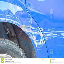

In [29]:
img

In [30]:
import numpy as np
x  = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = model.predict_classes(x)
x  = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = model.predict_classes(x)
a = index[pred[0]]
print(a)

scratch


In [31]:
img = image.load_img(r"C:\Users\AKHILA\Desktop\g.jpg",target_size = (64,64))

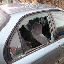

In [32]:
img

In [33]:
import numpy as np
x  = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = model.predict_classes(x)
x  = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = model.predict_classes(x)
a = index[pred[0]]
print(a)

glass_shatter


In [34]:
img = image.load_img(r"C:\Users\AKHILA\Desktop\hl.jpg",target_size = (64,64))

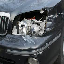

In [35]:
img

In [36]:
import numpy as np
x  = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = model.predict_classes(x)
x  = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = model.predict_classes(x)
a = index[pred[0]]
print(a)

headlight_broken


In [41]:
img = image.load_img(r"C:\Users\AKHILA\Desktop\d.jpg",target_size = (64,64))

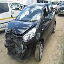

In [42]:
img

In [43]:
import numpy as np
x  = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = model.predict_classes(x)
x  = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = model.predict_classes(x)
a = index[pred[0]]
print(a)


glass_shatter
